In [26]:
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from sklearn.model_selection import train_test_split

In [27]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [28]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.shape

(158, 12)

In [5]:
Their are 158 rows and 12 columns in dataset

SyntaxError: invalid syntax (<ipython-input-5-5e7c3b697038>, line 1)

In [6]:
pd.set_option('display.max_rows', None)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [ ]:
#three data types are present in dataset i.e. object, int, float

In [8]:
df.shape

(158, 12)

In [9]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [13]:
encode = LabelEncoder() 

In [14]:
encode.fit_transform(df["Country"]) 

array([135,  58,  37, 105,  24,  45,  99, 134, 100,   6,  64,  33,   7,
        91, 150,  18,  82,  63,  12, 148, 149, 106, 153, 123, 109,  49,
        27, 115,  46,   4,  36, 151,  29, 140, 119, 129,  88, 137,  73,
       132, 142,  42,  52, 152, 124,  68, 128,  40,   9,  65,  15,  92,
       110,  70, 125,  81, 101, 111,  11, 113,  86,  34,  80, 117,  67,
       104,  35,   2,  72, 145,  90,  56,  43,  60, 154, 144,  74, 103,
        14,   8, 107,  69,  94,  28, 156, 116, 121, 114,  76, 112, 126,
        95,  83,  96,   1,  16,  78,  39,  75,  93, 133,  51,  77,  57,
        55, 138, 143, 108,  10,  61, 147,  62, 127,  50, 157,  79,  59,
       131,  54,  32,  98,  44, 122,  89,  71,  38,   5,  17,  97,  48,
        85, 130,  23,  19,  41, 155,   3,  87,  31,  30, 146, 120,  47,
       102,  22, 139,  84,  25,  26,  53,  66,  20,   0, 118,  13, 136,
        21, 141])

In [18]:
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=encode.fit_transform(df[i])

In [19]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,45,9,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,99,9,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,134,9,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,100,0,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,6,0,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [28]:
df=df[['Country', 'Region', 'Happiness Rank',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual','Happiness Score']]

In [29]:
df

,Country,Region,Happiness Rank,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Happiness Score
0,135,9,1,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,7.587
1,58,9,2,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,7.561
2,37,9,3,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,7.527
3,105,9,4,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,7.522
4,24,5,5,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,7.427
5,45,9,6,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955,7.406
6,99,9,7,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570,7.378
7,134,9,8,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119,7.364
8,100,0,9,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425,7.286
9,6,0,10,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646,7.284


In [30]:
x=df.iloc[:,:-1].values

In [34]:
x

array([[1.35000e+02, 9.00000e+00, 1.00000e+00, ..., 4.19780e-01,
        2.96780e-01, 2.51738e+00],
       [5.80000e+01, 9.00000e+00, 2.00000e+00, ..., 1.41450e-01,
        4.36300e-01, 2.70201e+00],
       [3.70000e+01, 9.00000e+00, 3.00000e+00, ..., 4.83570e-01,
        3.41390e-01, 2.49204e+00],
       ...,
       [1.36000e+02, 4.00000e+00, 1.56000e+02, ..., 1.89060e-01,
        4.71790e-01, 3.28580e-01],
       [2.10000e+01, 8.00000e+00, 1.57000e+02, ..., 1.00620e-01,
        1.97270e-01, 1.83302e+00],
       [1.41000e+02, 8.00000e+00, 1.58000e+02, ..., 1.07310e-01,
        1.66810e-01, 1.56726e+00]])

In [35]:
x[0]

array([1.35000e+02, 9.00000e+00, 1.00000e+00, 3.41100e-02, 1.39651e+00,
       1.34951e+00, 9.41430e-01, 6.65570e-01, 4.19780e-01, 2.96780e-01,
       2.51738e+00])

In [31]:
y=df.iloc[:,-1].values

In [32]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()

ln.fit(x, y)

LinearRegression()

In [36]:
ln.predict([x[0]])

array([7.58675015])

In [37]:
y[0]

7.587

In [38]:
from sklearn.svm import SVR

In [39]:
svr=SVR()

In [40]:
svr.fit(x,y)

SVR()

In [41]:
svr.predict([x[0]])

array([7.30399325])

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

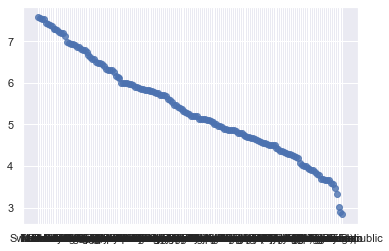

In [29]:
import seaborn as sns; sns.set_theme(color_codes=True)
sns.regplot(x="Country", y="Happiness Score", data=df)

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from statistics import mean, median, mode, stdev

<ipython-input-20-9f2db57a697c>:2: RuntimeWarning: covariance is not positive-semidefinite.
  x,y = np.random.multivariate_normal(mean, cov, 80).T


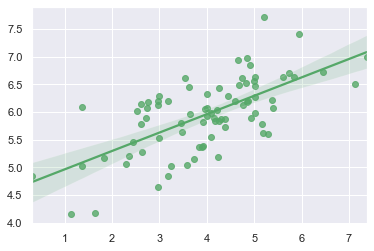

In [20]:
mean, cov = [4,6], [(1.5,.7), (.7,.1)]
x,y = np.random.multivariate_normal(mean, cov, 80).T
ax = sns.regplot (x=x, y=y, color = "g")

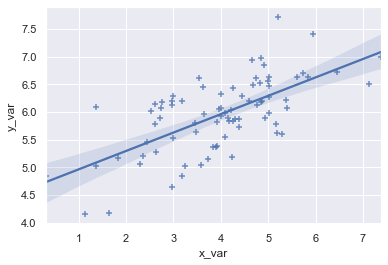

In [21]:
import pandas as pd
x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")
ax = sns.regplot(x=x, y=y, marker="+")

In [12]:
!pip install mglearn

  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=11d7474f4e74ed138745fc9ef9a29e7f5eb11c8ced4326bbf49d0d21c32b2ddf
  Stored in directory: c:\users\rahul\appdata\local\pip\cache\wheels\87\75\37\404e66d0c4bad150f101c9a0914b11a8eccc2681559936e7f7
Successfully built mglearn


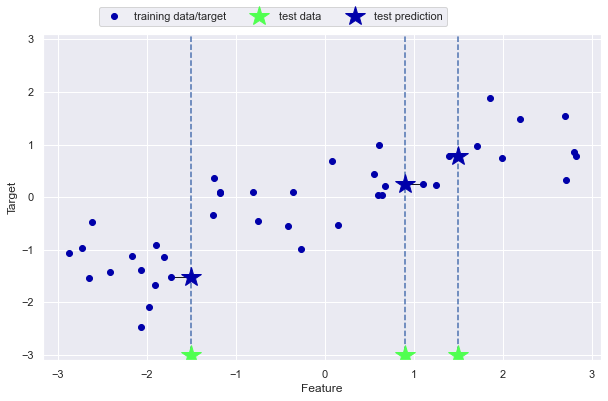

In [13]:
import mglearn 
import matplotlib.pyplot as plt
mglearn.plots.plot_knn_regression(n_neighbors=1)

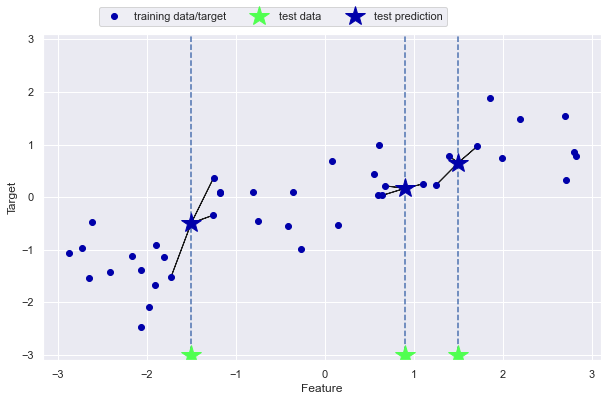

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)